In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Function to choose the value of k
def choose_k(X_train, y_train, X_test, y_test, max_k=10):
    k_values = list(range(1, max_k+1))
    accuracy_values = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    
    # Visualize the accuracy for different k values
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k = k_values[accuracy_values.index(max(accuracy_values))]
    return best_k

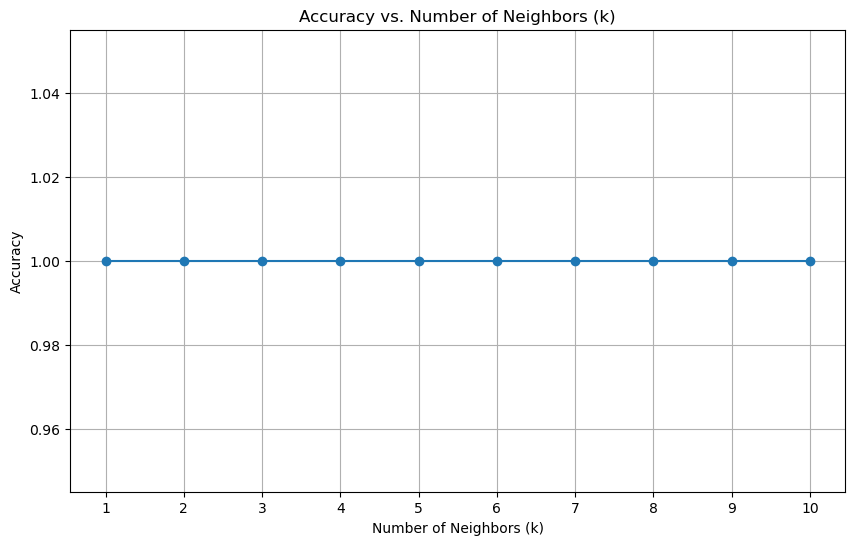

Best k: 1


In [6]:
# Choose the best k value
best_k = choose_k(X_train, y_train, X_test, y_test)
print("Best k:", best_k)

In [7]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
y_pred = knn.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



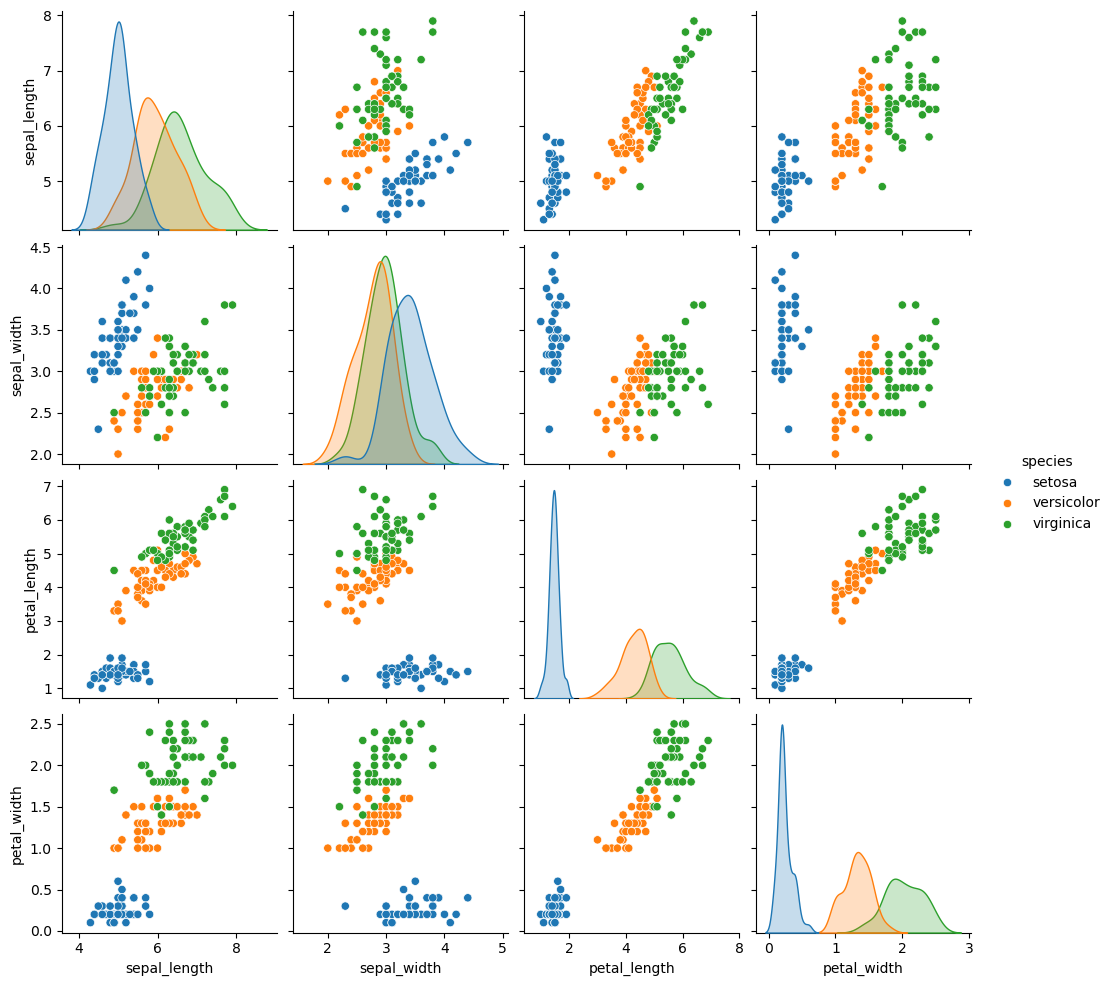

In [10]:
sns.pairplot(data, hue='species')
plt.show()
